In [1]:
import pandas as pd
import numpy as np
import glob
import os

# --- IMPORTANT ---
# Please change the path below to the location of the folder containing your CSV files.
# Example for Windows: path = r'C:\Users\YourUsername\Desktop\My_Project_Data'
# Example for Mac/Linux: path = '/Users/YourUsername/Desktop/My_Project_Data'

path = r'C:\Users\princ\ML_inno' # <--- CHANGE THIS

# Use glob to find all files in the folder ending with .csv
all_files = glob.glob(os.path.join(path, "*.csv"))

# Check if any files were found
if not all_files:
    print(f"No CSV files were found in the directory: {path}")
    print("Please make sure you have placed your files in the correct folder and updated the path variable.")
else:
    # Load each file into a pandas DataFrame and store them in a list
    # The 'latin1' encoding is used as it's common for this dataset to prevent errors
    df_from_each_file = (pd.read_csv(f, encoding='latin1', low_memory=False) for f in all_files)

    # Concatenate all DataFrames in the list into a single DataFrame
    merged_df = pd.concat(df_from_each_file, ignore_index=True)

    print(f"✅ Successfully merged {len(all_files)} files.")
    print("-------------------------------------------")
    print("Shape of the merged dataset (rows, columns):", merged_df.shape)
    print("First 5 rows of the dataset:")
    display(merged_df.head())

✅ Successfully merged 8 files.
-------------------------------------------
Shape of the merged dataset (rows, columns): (2830743, 79)
First 5 rows of the dataset:


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [2]:
# --- Code to Export the DataFrame to a CSV file ---

# Define the name for your new file
output_filename = 'merged_cicids_dataset.csv'

print(f"🔄 Saving the merged DataFrame to '{output_filename}'...")
print("This may take a few minutes depending on the file size.")

# Use the to_csv() function to save the DataFrame
# index=False prevents pandas from writing the DataFrame index as a column
merged_df.to_csv(output_filename, index=False)

print(f"\n✅ Successfully saved the file as '{output_filename}'!")

# You can check the file size for confirmation
file_size = os.path.getsize(output_filename) / (1024*1024) # in Megabytes
print(f"File size: {file_size:.2f} MB")

🔄 Saving the merged DataFrame to 'merged_cicids_dataset.csv'...
This may take a few minutes depending on the file size.

✅ Successfully saved the file as 'merged_cicids_dataset.csv'!
File size: 921.45 MB


✅ Successfully loaded 'merged_cicids_dataset.csv'.
Shape of the dataset (rows, columns): (2830743, 79)

🔄 Cleaned up column names.

Number of infinite values before cleaning: 4376
Number of NaN values before cleaning: 1358

✅ Replaced infinite values and dropped all rows with NaN values.
Number of rows removed: 2867
Shape of the dataset after cleaning: (2827876, 79)

--- Analysis of the 'Label' Column ---
Distribution of traffic types:
Label
BENIGN                          2271320
DoS Hulk                         230124
PortScan                         158804
DDoS                             128025
DoS GoldenEye                     10293
FTP-Patator                        7935
SSH-Patator                        5897
DoS slowloris                      5796
DoS Slowhttptest                   5499
Bot                                1956
Web Attack ï¿½ Brute Force         1507
Web Attack ï¿½ XSS                  652
Infiltration                         36
Web Attack ï¿½ Sql Injection      

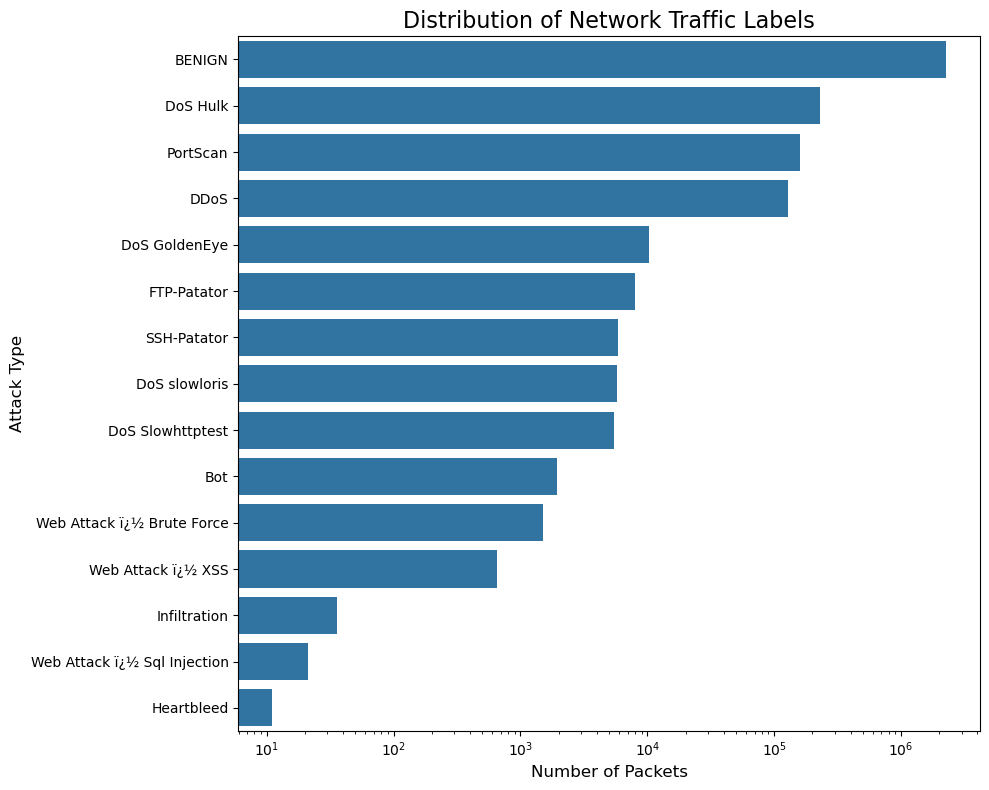


💡 Notice the extreme class imbalance.
The number of 'BENIGN' packets is vastly larger than any single attack type.


In [3]:
# --- Step 2: Data Cleaning & EDA (Corrected Code) ---

# 1. Load the merged dataset we created in the previous step
try:
    df = pd.read_csv('merged_cicids_dataset.csv')
    print("✅ Successfully loaded 'merged_cicids_dataset.csv'.")
    print("Shape of the dataset (rows, columns):", df.shape)
except FileNotFoundError:
    print("❌ Error: 'merged_cicids_dataset.csv' not found.")
    df = None 

if df is not None:
    # 2. Clean up column names
    df.rename(columns=lambda x: x.strip(), inplace=True)
    print("\n🔄 Cleaned up column names.")

    # 3. Handle corrupted data (Infinite and NaN values)
    # --- FIX IS HERE ---
    # First, let's see how much bad data we have before cleaning.
    # We select ONLY the numeric columns to check for infinity.
    numeric_cols = df.select_dtypes(include=np.number)
    infinite_values_count = np.isinf(numeric_cols.values).sum()
    
    print(f"\nNumber of infinite values before cleaning: {infinite_values_count}")
    print(f"Number of NaN values before cleaning: {df.isnull().sum().sum()}")

    # Replace infinite values with NaN (Not a Number)
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    
    # Drop all rows that have any NaN values
    rows_before_dropping = df.shape[0]
    df.dropna(inplace=True)
    rows_after_dropping = df.shape[0]
    
    print("\n✅ Replaced infinite values and dropped all rows with NaN values.")
    print(f"Number of rows removed: {rows_before_dropping - rows_after_dropping}")
    print("Shape of the dataset after cleaning:", df.shape)

    # 4. Initial analysis of the 'Label' column
    print("\n--- Analysis of the 'Label' Column ---")
    label_counts = df['Label'].value_counts()
    print("Distribution of traffic types:")
    print(label_counts)

    # 5. Visualize the class distribution
    import matplotlib.pyplot as plt
    import seaborn as sns

    plt.figure(figsize=(10, 8))
    sns.barplot(y=label_counts.index, x=label_counts.values)
    plt.title('Distribution of Network Traffic Labels', fontsize=16)
    plt.xlabel('Number of Packets', fontsize=12)
    plt.ylabel('Attack Type', fontsize=12)
    plt.xscale('log') 
    plt.tight_layout()
    plt.show()
    
    print("\n💡 Notice the extreme class imbalance.")
    print("The number of 'BENIGN' packets is vastly larger than any single attack type.")

In [4]:
# --- Action: Standardize Messy 'Label' Values ---

print("--- Before 'Label' column standardization ---")
# Let's print just the Web Attack labels to see the "before" state
web_attack_labels_before = df[df['Label'].str.contains('Web Attack', na=False)]['Label'].unique()
print(f"Original Web Attack labels: {web_attack_labels_before}")

# 1. Define the mapping dictionary
# We map the "messy" string (key) to the "clean" string (value)
label_map = {
    'Web Attack ï¿½ Brute Force': 'Web Attack - Brute Force',
    'Web Attack ï¿½ XSS':          'Web Attack - XSS',
    'Web Attack ï¿½ Sql Injection': 'Web Attack - Sql Injection'
}

# 2. Apply the mapping to the 'Label' column in our main DataFrame
# inplace=True modifies the 'df' DataFrame directly
df['Label'].replace(label_map, inplace=True)

print("\n--- After 'Label' column standardization ---")
# Print the Web Attack labels again to show the "after" state
web_attack_labels_after = df[df['Label'].str.contains('Web Attack', na=False)]['Label'].unique()
print(f"Cleaned Web Attack labels: {web_attack_labels_after}")

# 3. Verify the changes in the full dataset
print("\n✅ Full label distribution is now clean:")
print(df['Label'].value_counts())

--- Before 'Label' column standardization ---
Original Web Attack labels: ['Web Attack ï¿½ Brute Force' 'Web Attack ï¿½ XSS'
 'Web Attack ï¿½ Sql Injection']

--- After 'Label' column standardization ---
Cleaned Web Attack labels: ['Web Attack - Brute Force' 'Web Attack - XSS'
 'Web Attack - Sql Injection']

✅ Full label distribution is now clean:
Label
BENIGN                        2271320
DoS Hulk                       230124
PortScan                       158804
DDoS                           128025
DoS GoldenEye                   10293
FTP-Patator                      7935
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1956
Web Attack - Brute Force         1507
Web Attack - XSS                  652
Infiltration                       36
Web Attack - Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64


In [5]:
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore') # To ignore common warnings

# --- Step 3: Data Preparation for Binary Classification (Corrected) ---

# 1. Create the binary target variable 'is_malicious'
df['is_malicious'] = np.where(df['Label'] == 'BENIGN', 0, 1)

print("✅ Created binary target column 'is_malicious'.")
print("Value counts for 'is_malicious':")
print(df['is_malicious'].value_counts())

# 2. Define Features (X) and Target (y)
# --- FIX IS HERE ---
# We are only dropping 'Label' and 'is_malicious'.
X = df.drop(['Label', 'is_malicious'], axis=1)
y = df['is_malicious']

print("\n✅ Defined features (X) and target (y).")

# 3. Split the data into training and testing sets
# This is the line that actually creates X_train, y_train, X_test, and y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\n✅ Split data into training and testing sets.")
print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))
print("The 'X_train' variable is now defined and ready to be used!")

✅ Created binary target column 'is_malicious'.
Value counts for 'is_malicious':
is_malicious
0    2271320
1     556556
Name: count, dtype: int64

✅ Defined features (X) and target (y).

✅ Split data into training and testing sets.
Training set size: 2262300
Testing set size: 565576
The 'X_train' variable is now defined and ready to be used!


In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

class AdvancedFeatureSelector:
    """
    A class to find feature importances once, and then analyze
    the information retention for different numbers of top features.
    """
    def __init__(self):
        """Initializes the selector."""
        self.selector_model = None
        self.full_feature_importances_ = None # Will store the sorted DataFrame
        self.selected_features_ = None # Will be set by set_n_features
        self.cumulative_importance_ = None
        self._is_fitted = False

    def fit(self, X, y):
        """
        Learns feature importances from ALL features.
        This is the slow part and only needs to be run once.
        
        Args:
            X (pd.DataFrame): The training feature data (unscaled).
            y (pd.Series): The training target data.
        """
        print("Fitting a RandomForestClassifier to learn all feature importances...")
        print("This may take a minute or two, please wait...")
        if not isinstance(X, pd.DataFrame):
            raise TypeError("Input X must be a pandas DataFrame.")
            
        # We train the model on the unscaled data 'X_train'
        self.selector_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
        self.selector_model.fit(X, y)
        
        # Store all feature importances in a sorted DataFrame
        importances_df = pd.DataFrame({
            'Feature': X.columns,
            'Importance': self.selector_model.feature_importances_
        }).sort_values(by='Importance', ascending=False)
        
        self.full_feature_importances_ = importances_df
        self._is_fitted = True
        print("✅ Fit complete. All feature importances have been calculated and saved.")
        return self

    def analyze_feature_retention(self, n_features_list):
        """
        Analyzes and prints the cumulative importance for different numbers of features.
        This method is very fast as the model is already fitted.
        """
        if not self._is_fitted:
            raise RuntimeError("You must call fit() before calling this method.")
        
        print("\n--- Analysis of Information Retained ---")
        results = []
        for n in n_features_list:
            # Ensure we don't ask for more features than we have
            if n > len(self.full_feature_importances_):
                print(f"Warning: {n} features requested, but only {len(self.full_feature_importances_)} available. Using max.")
                n = len(self.full_feature_importances_)
                
            # Calculate cumulative importance for the top 'n' features
            importance = self.full_feature_importances_['Importance'].head(n).sum()
            results.append({'n_features': n, 'cumulative_importance': importance})
            
            # Print the result
            print(f"Top {n:<3} features retain: {importance:.4f} (or {importance:.2%}) of total importance.")
        
        print("----------------------------------------")
        return pd.DataFrame(results)

    def set_n_features(self, n):
        """
        Selects the top 'n' features to be used by the transform() method.
        """
        if not self._is_fitted:
            raise RuntimeError("You must call fit() before calling this method.")
        
        self.selected_features_ = self.full_feature_importances_['Feature'].head(n).tolist()
        self.cumulative_importance_ = self.full_feature_importances_['Importance'].head(n).sum()
        
        print(f"\n✅ Selector is now set to use the top {n} features.")
        print(f"These features retain {self.cumulative_importance_:.2%} of total importance.")
        
    def transform(self, X):
        """
        Transforms the dataset to keep only the features selected by set_n_features().
        """
        if self.selected_features_ is None:
            raise RuntimeError("You must call set_n_features(n) before calling transform().")
        
        # Return a new DataFrame with only the selected columns
        return X[self.selected_features_]

In [7]:
# --- Experimenting with Feature Selection ---

# 1. Define the list of feature counts you want to test
n_features_to_compare = [10, 15, 20, 25, 30, 35, 40]

# 2. Initialize and fit the selector ONCE
# This is the only slow step. We use the unscaled 'X_train' and 'y_train'.
adv_selector = AdvancedFeatureSelector()
adv_selector.fit(X_train, y_train) 

# 3. Analyze the results
# This part is very fast as the calculations are already done.
analysis_results_df = adv_selector.analyze_feature_retention(n_features_to_compare)

# --- This is where you make your decision ---
# Look at the printed output. Find the "sweet spot".
# For example, 25 features might retain 97.5% of the info,
# while 30 features only add 0.5% more. This means 25 is a great choice.
#
# Change this variable based on your analysis:
BEST_N_FEATURES = 40 # <--- CHANGE THIS BASED ON THE OUTPUT
# -----------------------------------------------

# 4. Set the selector to use your chosen best number
adv_selector.set_n_features(BEST_N_FEATURES)
print("\nThe following features will be used for training:")
for i, feature in enumerate(adv_selector.selected_features_):
    print(f"  {i+1}. {feature}")

# 5. Transform both the training and testing sets
X_train_selected = adv_selector.transform(X_train)
X_test_selected = adv_selector.transform(X_test)

# 6. Scale the new, smaller datasets
scaler_selected_features = StandardScaler()
X_train_selected_scaled = scaler_selected_features.fit_transform(X_train_selected)
X_test_selected_scaled = scaler_selected_features.transform(X_test_selected)

print(f"\n✅ Datasets created using the top {BEST_N_FEATURES} features.")
print(f"Shape of new scaled training set: {X_train_selected_scaled.shape}")
print(f"Shape of new scaled testing set: {X_test_selected_scaled.shape}")

Fitting a RandomForestClassifier to learn all feature importances...
This may take a minute or two, please wait...
✅ Fit complete. All feature importances have been calculated and saved.

--- Analysis of Information Retained ---
Top 10  features retain: 0.4898 (or 48.98%) of total importance.
Top 15  features retain: 0.6130 (or 61.30%) of total importance.
Top 20  features retain: 0.7058 (or 70.58%) of total importance.
Top 25  features retain: 0.7773 (or 77.73%) of total importance.
Top 30  features retain: 0.8334 (or 83.34%) of total importance.
Top 35  features retain: 0.8807 (or 88.07%) of total importance.
Top 40  features retain: 0.9220 (or 92.20%) of total importance.
----------------------------------------

✅ Selector is now set to use the top 40 features.
These features retain 92.20% of total importance.

The following features will be used for training:
  1. Max Packet Length
  2. Avg Bwd Segment Size
  3. Packet Length Variance
  4. Packet Length Std
  5. Destination Port
 

🚀 Starting model training and evaluation...
Training models using the selected 40 features.

--- Training Decision Tree ---
✅ Decision Tree trained successfully.

--- Evaluation Report for Decision Tree ---
               precision    recall  f1-score   support

   BENIGN (0)       1.00      1.00      1.00    454265
MALICIOUS (1)       1.00      1.00      1.00    111311

     accuracy                           1.00    565576
    macro avg       1.00      1.00      1.00    565576
 weighted avg       1.00      1.00      1.00    565576

Confusion Matrix:


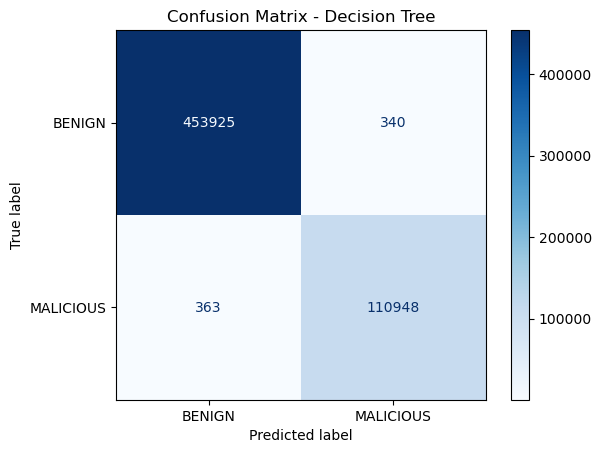


--- Training Logistic Regression ---
✅ Logistic Regression trained successfully.

--- Evaluation Report for Logistic Regression ---
               precision    recall  f1-score   support

   BENIGN (0)       0.91      0.97      0.94    454265
MALICIOUS (1)       0.82      0.63      0.71    111311

     accuracy                           0.90    565576
    macro avg       0.86      0.80      0.82    565576
 weighted avg       0.89      0.90      0.89    565576

Confusion Matrix:


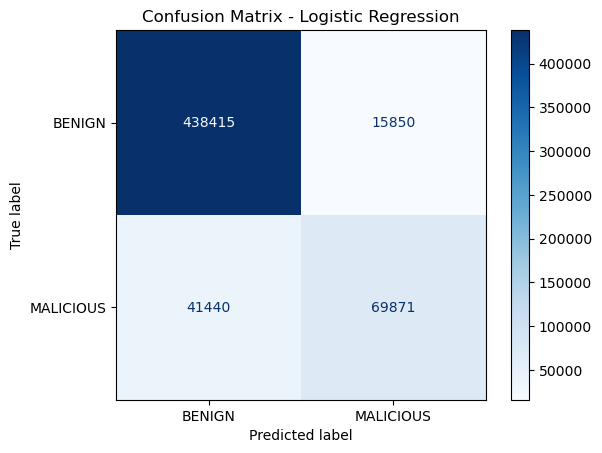


--- Training Random Forest ---
✅ Random Forest trained successfully.

--- Evaluation Report for Random Forest ---
               precision    recall  f1-score   support

   BENIGN (0)       1.00      1.00      1.00    454265
MALICIOUS (1)       1.00      1.00      1.00    111311

     accuracy                           1.00    565576
    macro avg       1.00      1.00      1.00    565576
 weighted avg       1.00      1.00      1.00    565576

Confusion Matrix:


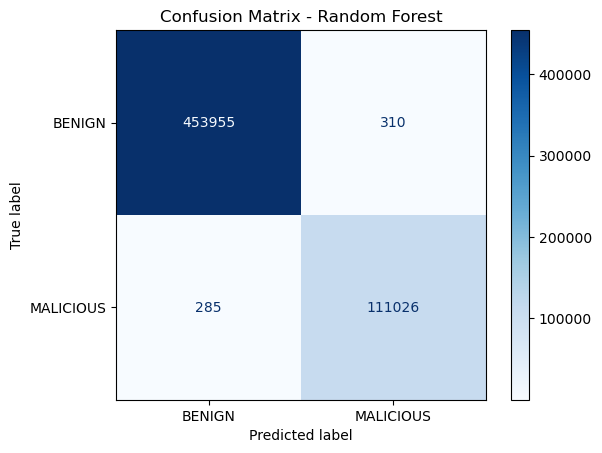


🎉 Model evaluation complete!


In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# --- Step 4: Train and Evaluate Binary Classification Models ---

print("🚀 Starting model training and evaluation...")
print(f"Training models using the selected {X_train_selected_scaled.shape[1]} features.")

# We will store our models and their names in a dictionary for easy looping
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42, n_jobs=-1, solver='saga'),
    #"K-Nearest Neighbors (KNN)": KNeighborsClassifier(n_neighbors=5), 
    "Random Forest": RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=100)
}

# Loop through each model in our dictionary
for name, model in models.items():
    print(f"\n--- Training {name} ---")
    
    # 1. Train the model on our selected, scaled training data
    model.fit(X_train_selected_scaled, y_train)
    print(f"✅ {name} trained successfully.")
    
    # 2. Make predictions on the unseen test data
    y_pred = model.predict(X_test_selected_scaled)
    
    # 3. Evaluate the model
    print(f"\n--- Evaluation Report for {name} ---")
    # We print a detailed classification report
    # target_names=['BENIGN (0)', 'MALICIOUS (1)'] makes the report easier to read
    print(classification_report(y_test, y_pred, target_names=['BENIGN (0)', 'MALICIOUS (1)']))
    
    # 4. Display the Confusion Matrix
    print("Confusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['BENIGN', 'MALICIOUS'])
    disp.plot(cmap=plt.cm.Blues, values_format='d') # 'd' formats numbers as integers
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

print("\n🎉 Model evaluation complete!")

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import os # We need this to check the file size

# --- Step 5: Prepare Data for Model 2 (with CSV Export) ---

print(f"Original full dataset shape: {df.shape}")

# 1. Create a new DataFrame containing ONLY the malicious packets
# We use our main 'df' which has the clean labels
malicious_df = df[df['Label'] != 'BENIGN'].copy()

print(f"New 'malicious_df' shape (rows, columns): {malicious_df.shape}")
print("Attack types in this new dataset:")
print(malicious_df['Label'].value_counts())

# --- NEW EXPORT STEP ---
output_filename_multi = 'malicious_packets_only.csv'
print(f"\n🔄 Saving this new malicious-only dataset to '{output_filename_multi}'...")

# Save the DataFrame to a new CSV
malicious_df.to_csv(output_filename_multi, index=False)

print(f"✅ Successfully saved '{output_filename_multi}'!")
file_size_multi = os.path.getsize(output_filename_multi) / (1024*1024)
print(f"File size: {file_size_multi:.2f} MB")
print("In the future, you can start your Model 2 work by just loading this file.")
# --- END NEW EXPORT STEP ---


# 2. Define Features (X) and Target (y) for the new model
# We use the same top 40 features we selected earlier
X_multi = malicious_df[adv_selector.selected_features_]
y_multi = malicious_df['Label']

print(f"\nShape of X_multi: {X_multi.shape}")
print(f"Shape of y_multi: {y_multi.shape}")

# 3. Encode the Target (y)
label_encoder = LabelEncoder()
y_multi_encoded = label_encoder.fit_transform(y_multi)

# We can see the mapping
print("\n--- Label Encoding ---")
for i, class_name in enumerate(label_encoder.classes_):
    print(f"{class_name.ljust(30)}  --->  {i}")
print("----------------------")


# 4. Split and Scale the new data
X_multi_train, X_multi_test, y_multi_train, y_multi_test = train_test_split(
    X_multi, y_multi_encoded, test_size=0.2, random_state=42, stratify=y_multi_encoded
)

# We use the SAME scaler we fit earlier ('scaler_selected_features')
X_multi_train_scaled = scaler_selected_features.transform(X_multi_train)
X_multi_test_scaled = scaler_selected_features.transform(X_multi_test)

print("\n✅ Data for Model 2 is now split, encoded, and scaled.")
print(f"Training set shape: {X_multi_train_scaled.shape}")
print(f"Testing set shape: {X_multi_test_scaled.shape}")

Original full dataset shape: (2827876, 80)
New 'malicious_df' shape (rows, columns): (556556, 80)
Attack types in this new dataset:
Label
DoS Hulk                      230124
PortScan                      158804
DDoS                          128025
DoS GoldenEye                  10293
FTP-Patator                     7935
SSH-Patator                     5897
DoS slowloris                   5796
DoS Slowhttptest                5499
Bot                             1956
Web Attack - Brute Force        1507
Web Attack - XSS                 652
Infiltration                      36
Web Attack - Sql Injection        21
Heartbleed                        11
Name: count, dtype: int64

🔄 Saving this new malicious-only dataset to 'malicious_packets_only.csv'...
✅ Successfully saved 'malicious_packets_only.csv'!
File size: 187.17 MB
In the future, you can start your Model 2 work by just loading this file.

Shape of X_multi: (556556, 40)
Shape of y_multi: (556556,)

--- Label Encoding ---
Bot        

🚀 Starting training for Model 2 (Multi-Class Attack Classifier)...
Training on 445244 attack samples.


--- Training Model 2: Decision Tree ---
Training model...
✅ Decision Tree trained successfully.

--- Evaluation Report for Decision Tree ---
                            precision    recall  f1-score   support

                       Bot       1.00      1.00      1.00       391
                      DDoS       1.00      1.00      1.00     25605
             DoS GoldenEye       0.99      1.00      0.99      2059
                  DoS Hulk       1.00      1.00      1.00     46025
          DoS Slowhttptest       0.99      0.99      0.99      1100
             DoS slowloris       0.99      0.99      0.99      1159
               FTP-Patator       1.00      1.00      1.00      1587
                Heartbleed       1.00      1.00      1.00         2
              Infiltration       1.00      0.86      0.92         7
                  PortScan       1.00      1.00      1.00     31761
      

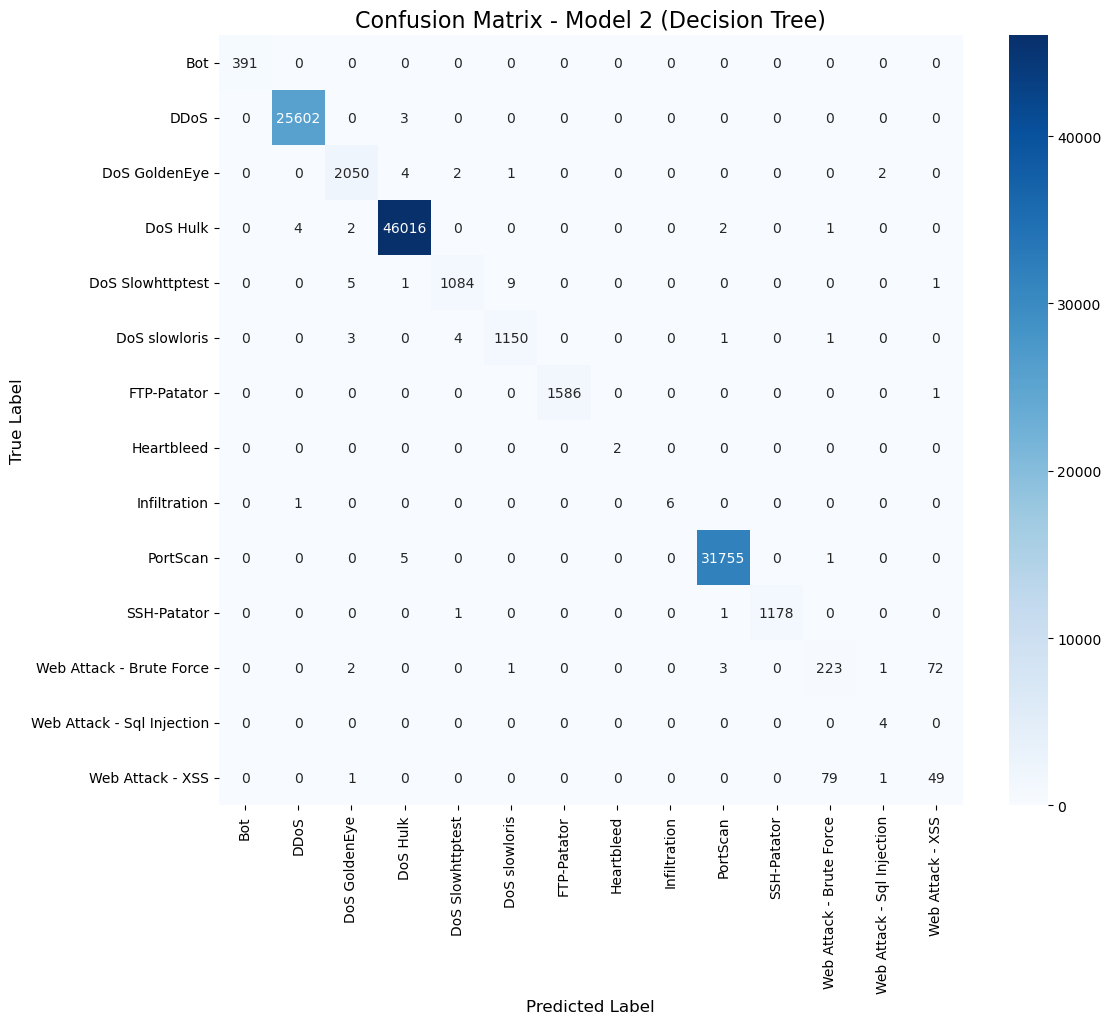



--- Training Model 2: Logistic Regression ---
Training model...
✅ Logistic Regression trained successfully.

--- Evaluation Report for Logistic Regression ---
                            precision    recall  f1-score   support

                       Bot       1.00      0.25      0.40       391
                      DDoS       0.98      0.98      0.98     25605
             DoS GoldenEye       0.98      0.97      0.98      2059
                  DoS Hulk       0.96      0.99      0.97     46025
          DoS Slowhttptest       0.92      0.84      0.88      1100
             DoS slowloris       0.84      0.53      0.65      1159
               FTP-Patator       0.96      0.49      0.65      1587
                Heartbleed       0.00      0.00      0.00         2
              Infiltration       0.00      0.00      0.00         7
                  PortScan       0.98      1.00      0.99     31761
               SSH-Patator       0.97      0.51      0.66      1180
  Web Attack - Brute F

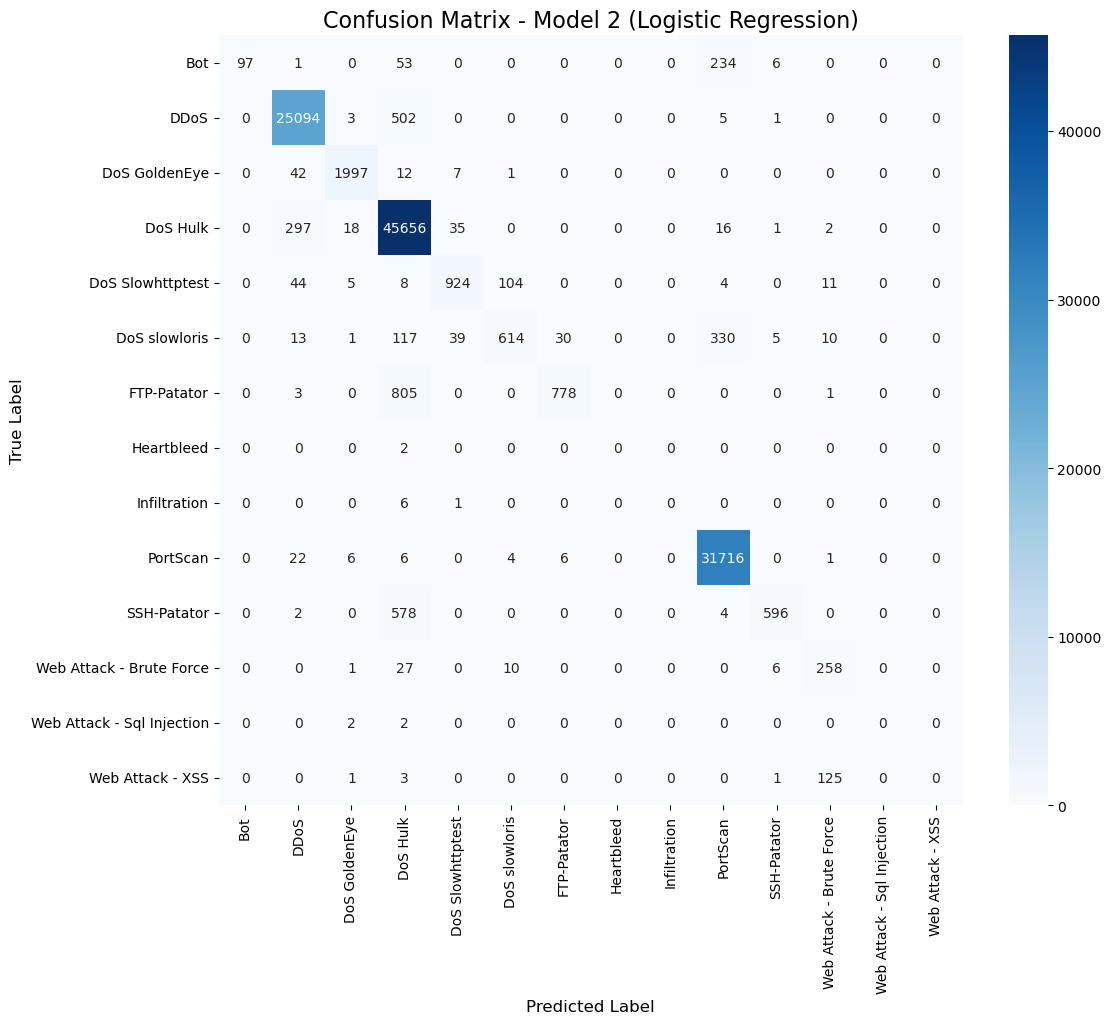



--- Training Model 2: Random Forest ---
Training model...
✅ Random Forest trained successfully.

--- Evaluation Report for Random Forest ---
                            precision    recall  f1-score   support

                       Bot       1.00      1.00      1.00       391
                      DDoS       1.00      1.00      1.00     25605
             DoS GoldenEye       1.00      1.00      1.00      2059
                  DoS Hulk       1.00      1.00      1.00     46025
          DoS Slowhttptest       1.00      0.99      0.99      1100
             DoS slowloris       0.99      0.99      0.99      1159
               FTP-Patator       1.00      1.00      1.00      1587
                Heartbleed       1.00      1.00      1.00         2
              Infiltration       1.00      0.71      0.83         7
                  PortScan       1.00      1.00      1.00     31761
               SSH-Patator       1.00      1.00      1.00      1180
  Web Attack - Brute Force       0.73   

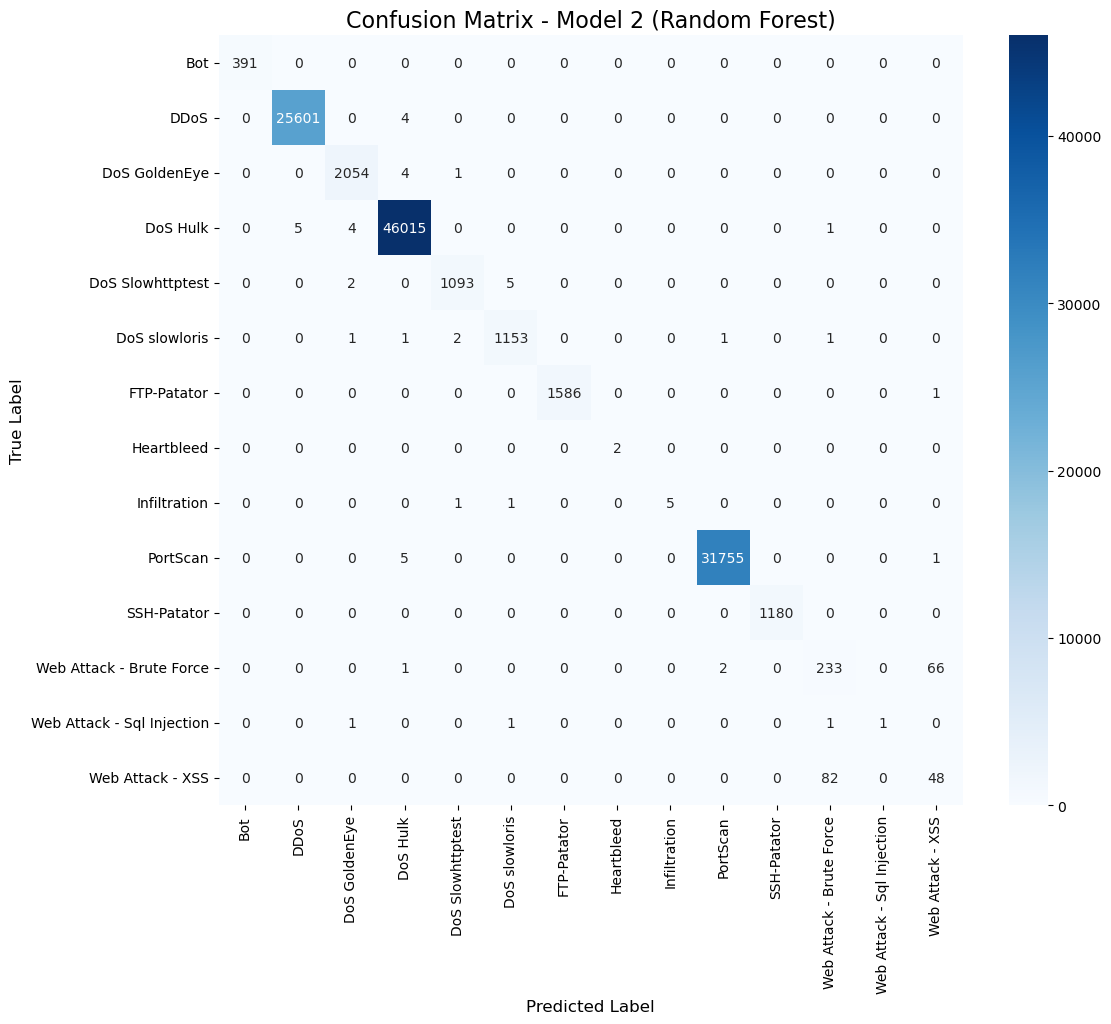


🎉 Project Complete! 🎉
You have successfully built and compared models for your two-tiered system.


In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 6: Train and Evaluate Model 2 (Comparing 3 Models) ---

print("🚀 Starting training for Model 2 (Multi-Class Attack Classifier)...")
print(f"Training on {X_multi_train_scaled.shape[0]} attack samples.")

# 1. Initialize all three models and store them in a dictionary
models_multi = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42, n_jobs=-1, solver='saga', max_iter=1000), # Increased max_iter for convergence
    "Random Forest": RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=100)
}

# We need the class names for the reports
target_names = label_encoder.classes_

# 2. Loop through each model to train, predict, and evaluate
for name, model in models_multi.items():
    
    print(f"\n\n--- Training Model 2: {name} ---")
    
    # 3. Train the model
    print("Training model...")
    model.fit(X_multi_train_scaled, y_multi_train)
    print(f"✅ {name} trained successfully.")

    # 4. Make predictions on the unseen test data
    y_multi_pred = model.predict(X_multi_test_scaled)

    # 5. Evaluate the model with a detailed Classification Report
    print(f"\n--- Evaluation Report for {name} ---")
    print(classification_report(y_multi_test, y_multi_pred, target_names=target_names))

    # 6. Display the Heatmap Confusion Matrix
    print(f"\n--- Confusion Matrix for {name} ---")
    cm_multi = confusion_matrix(y_multi_test, y_multi_pred)

    plt.figure(figsize=(12, 10))
    sns.heatmap(cm_multi, 
                annot=True,     # Show the numbers in each cell
                fmt='d',        # Format as integers
                cmap='Blues',   # Use the blue color palette
                xticklabels=target_names,
                yticklabels=target_names)
    plt.title(f'Confusion Matrix - Model 2 ({name})', fontsize=16)
    plt.ylabel('True Label', fontsize=12)
    plt.xlabel('Predicted Label', fontsize=12)
    plt.show()

print("\n🎉 Project Complete! 🎉")
print("You have successfully built and compared models for your two-tiered system.")